# Final Assesment - M504B AI and Applications


# 1) Data Collection

  - Uploading the dataset on to google colab using google drive to analyse the dataset by importing pandas package as the variable pd.

  - And importing other dependancies for coding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  - Uploading from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### - About the data
  - This data is considered to be a data of bookshop/company. It consists data's till 2016. It contains information about the book's genre, authors and publishers of the book as well ratings of the book and the author.
  - It also have the amount of sales brought to the company which is in gross sales.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Books_Data.csv")
df.head()

index  Publishing Year                        Book Name  \
0      0           1975.0                          Beowulf   
1      1           1987.0                 Batman: Year One   
2      2           2015.0                Go Set a Watchman   
3      3           2008.0  When You Are Engulfed in Flames   
4      4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23              145267  genre fiction   
2        Novice                 3.31              138669  genre fiction   
3  Intermediate                 4.04              150898        fiction   
4  Intermediate                 4.04              198283  genre fiction   

   gross sales  publisher revenue  sale price  sales rank  \
0      34160.0            20496.0        4.88           1   
1      12437.5             7462.5        1.99           2   
2      47795.0            28677.0        8.69           3   
3      41250.0            24750.0        7.50           3   
4      37952.5            22771.5        7.99           4   

                       Publisher   units sold  
0        HarperCollins Publishers        7000  
1        HarperCollins Publishers        6250  
2  Amazon Digital Services,  Inc.        5500  
3             Hachette Book Group        5500  
4         Penguin Group (USA) LLC        4750

  - Exploring some information about the dataset using info() regarding dataset of each column and regarding null counts.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

  - describe().T for statistical analysis of numerical columns.

In [5]:
df.describe().T

count          mean           std       min        25%  \
index                1070.0    534.500000    309.026698      0.00    267.250   
Publishing Year      1069.0   1971.377923    185.080257   -560.00   1985.000   
Book_average_rating  1070.0      4.007000      0.247244      2.97      3.850   
Book_ratings_count   1070.0  94909.913084  31513.242518  27308.00  70398.000   
gross sales          1070.0   1856.622944   3936.924240    104.94    372.465   
publisher revenue    1070.0    843.281030   2257.596743      0.00      0.000   
sale price           1070.0      4.869561      3.559919      0.99      1.990   
sales rank           1070.0    611.652336    369.849830      1.00    287.500   
units sold           1070.0   9676.980374  15370.571306    106.00    551.250   

                           50%          75%        max  
index                  534.500     801.7500    1069.00  
Publishing Year       2003.000    2010.0000    2016.00  
Book_average_rating      4.015       4.1700       4.77  
Book_ratings_count   89309.000  113906.5000  206792.00  
gross sales            809.745    1487.9575   47795.00  
publisher revenue      273.078     721.1805   28677.00  
sale price               3.990       6.9900      33.86  
sales rank             595.500     932.5000    1273.00  
units sold            3924.000    5312.2500   61560.00

# 2) Data Cleaning

  - Handling the null and Insignificant values.

- As seen, the columns, "Publishing Year", "Book Name" and "language_code" have null values and the "language_code" has highest null values compared to other two columns.

In [6]:
df.isnull().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

- Dealing with null value of the column "Publishing Year" by finding the minimum year and maximum year.
- But the minimum value in the column is negative which is not possible for year. Therefore I have set a minimum year range which is 1300 which is a meaningful year where books can be published.


In [7]:
df["Publishing Year"].min()

-560.0

In [8]:
df["Publishing Year"].max()

2016.0

- There are more than one negative values and all the  years less than 1300 is all negative and the book names are not clear therefore deleting the negative rows as there is no book name makes the row inapplicable.

In [9]:
df[df["Publishing Year"] <= 1300]

index  Publishing Year                           Book Name  \
241    241           -380.0                    Î Î¿Î»Î¹Ï„ÎµÎ¯Î±   
293    293           -430.0  ÎŸá¼°Î´Î¯Ï€Î¿Ï…Ï‚ Î¤ÏÏÎ±Î½Î½Î¿Ï‚   
568    568           -300.0          é“å¾·ç¶“ [dÃ o dÃ© jÄ«ng]   
589    589           -560.0                            Aesopica   
749    749            -17.0                              Ã†neis   
990    990           -441.0                   á¼ˆÎ½Ï„Î¹Î³ÏŒÎ½Î·   

                                                Author language_code  \
241                                 Plato, Desmond Lee           eng   
293                             Sophocles, J.E. Thomas           eng   
568  Lao Tzu, Gia-Fu Feng, Jane English, Chungliang...           eng   
589                   Aesop, Laura Harris, Laura Gibbs           eng   
749                          Virgil, Robert Fitzgerald           eng   
990                             Sophocles, J.E. Thomas           eng   

    Author_Rating  Book_average_rating  Book_ratings_count          genre  \
241  Intermediate                 3.90              110274  genre fiction   
293  Intermediate                 3.67              119496  genre fiction   
568     Excellent                 4.31               39863  genre fiction   
589     Excellent                 4.05               88508  genre fiction   
749  Intermediate                 3.81               75051  genre fiction   
990  Intermediate                 3.60               67608  genre fiction   

     gross sales  publisher revenue  sale price  sales rank  \
241       387.09            232.254        0.99         265   
293      2460.92           1476.552        7.99         315   
568       665.55            399.330        4.59         632   
589       693.61              0.000        4.99         663   
749       114.84              0.000        0.99         863   
990       106.92             64.152        0.99        1167   

                         Publisher   units sold  
241  Amazon Digital Services,  Inc.         391  
293             Hachette Book Group         308  
568         Penguin Group (USA) LLC        3915  
589  Amazon Digital Services,  Inc.       53784  
749  Amazon Digital Services,  Inc.       31752  
990  Amazon Digital Services,  Inc.         108

In [10]:
df.drop(df[df["Publishing Year"] <= 1300].index, inplace = True)

In [11]:
df[df["Publishing Year"] <= 1300]

Empty DataFrame
Columns: [index, Publishing Year, Book Name, Author, language_code, Author_Rating, Book_average_rating, Book_ratings_count, genre, gross sales, publisher revenue, sale price, sales rank, Publisher , units sold]
Index: []

- Removing the null value of the column "Publishing Year" using isnull() as the Book Name is null for the same.

In [12]:
print(df[df["Publishing Year"].isnull()])

     index  Publishing Year Book Name                     Author  \
445    445              NaN       NaN  Robert Kapilow, Dr. Seuss   

    language_code Author_Rating  Book_average_rating  Book_ratings_count  \
445           NaN        Famous                 4.44               90574   

          genre  gross sales  publisher revenue  sale price  sales rank  \
445  nonfiction       532.22            319.332        2.99         493   

              Publisher   units sold  
445  Hachette Book Group        4806  


In [13]:
df.drop(df[df["Publishing Year"].isnull()].index, inplace = True)

- Converting the year from float to integer.

In [14]:
df["Publishing Year"].astype(int)

0       1975
1       1987
2       2015
3       2008
4       2011
        ... 
1065    2014
1066    1989
1067    1930
1068    2011
1069    1999
Name: Publishing Year, Length: 1063, dtype: int64

- Dropping all the nun rows of the column "Book Name" using isnull() as it is meaningless to perform analysis without a book name.

In [15]:
df.drop(df[df["Book Name"].isnull()].index, inplace = True)

- Deleting the column "language_code" as most of the books are english and there are very less amount of book of other languages.

In [16]:
df["language_code"].value_counts()

language_code
eng      719
en-US    228
en-GB     29
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64

In [17]:
del df["language_code"]

In [18]:
df.isnull().sum()

index                  0
Publishing Year        0
Book Name              0
Author                 0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64

While coding I figured out that there was a whitespace in the solumn name "Publisher". There using rename() function I renamed the column name without a whitespace.

In [19]:
df.rename(columns={"Publisher ":"Publisher"}, inplace= True)

# 3) Data Exploration

This dataset contains 1041 columns and 14 rows. shape() is udes to know the size of the dataset.

In [20]:
df.shape

(1041, 14)

In [21]:
df[df.duplicated()]

Empty DataFrame
Columns: [index, Publishing Year, Book Name, Author, Author_Rating, Book_average_rating, Book_ratings_count, genre, gross sales, publisher revenue, sale price, sales rank, Publisher, units sold]
Index: []

Understanding the categories of author rating and genre.

In [22]:
df["Author_Rating"].value_counts()

Author_Rating
Intermediate    614
Excellent       348
Famous           49
Novice           30
Name: count, dtype: int64

In [23]:
df["genre"].value_counts()

genre
genre fiction    799
nonfiction       168
fiction           59
children          15
Name: count, dtype: int64

 Highest and least sold books


In [24]:
print(df["gross sales"].max())
df.loc[df["gross sales"].idxmax()].to_frame().T

47795.0


index Publishing Year          Book Name      Author Author_Rating  \
2     2          2015.0  Go Set a Watchman  Harper Lee        Novice   

  Book_average_rating Book_ratings_count          genre gross sales  \
2                3.31             138669  genre fiction     47795.0   

  publisher revenue sale price sales rank                       Publisher  \
2           28677.0       8.69          3  Amazon Digital Services,  Inc.   

  units sold  
2       5500

In [25]:
print(df["gross sales"].min())
df.loc[df["gross sales"].idxmin()].to_frame().T

104.94


index Publishing Year  Book Name       Author Author_Rating  \
1047  1047          1987.0  Intensity  Dean Koontz     Excellent   

     Book_average_rating Book_ratings_count          genre gross sales  \
1047                4.04              58062  genre fiction      104.94   

     publisher revenue sale price sales rank                       Publisher  \
1047               0.0       0.99       1238  Amazon Digital Services,  Inc.   

     units sold  
1047        106

Highest and least rated book

In [26]:
print(df["Book_average_rating"].max())
df.loc[df["Book_average_rating"].idxmax()].to_frame().T

4.77


index Publishing Year          Book Name             Author Author_Rating  \
331   331          2014.0  Words of Radiance  Brandon Sanderson        Famous   

    Book_average_rating Book_ratings_count          genre gross sales  \
331                4.77              73572  genre fiction      741.52   

    publisher revenue sale price sales rank                 Publisher  \
331           444.912       2.99        354  HarperCollins Publishers   

    units sold  
331        248

In [27]:
print(df["Book_average_rating"].min())
df.loc[df["Book_average_rating"].idxmin()].to_frame().T

2.97


index Publishing Year                  Book Name         Author  \
878   878          2008.0  The 3 Mistakes of My Life  Chetan Bhagat   

    Author_Rating Book_average_rating Book_ratings_count          genre  \
878  Intermediate                2.97              53331  genre fiction   

    gross sales publisher revenue sale price sales rank         Publisher  \
878      894.88           536.928       7.99       1032  Random House LLC   

    units sold  
878       4440

Highest and lowest priced books

In [28]:
df.loc[df["sale price"].idxmax()].to_frame().T

index Publishing Year                Book Name  \
295   295          1908.0  The Wind in the Willows   

                             Author Author_Rating Book_average_rating  \
295  Kenneth Grahame, Gillian Avery  Intermediate                3.98   

    Book_ratings_count          genre gross sales publisher revenue  \
295             124612  genre fiction     10327.3           6196.38   

    sale price sales rank                Publisher units sold  
295      33.86        317  Penguin Group (USA) LLC        305

In [29]:
df.loc[df["sale price"].idxmin()].to_frame().T

index Publishing Year        Book Name         Author Author_Rating  \
12    12          2010.0  Last Sacrifice   Richelle Mead        Famous   

   Book_average_rating Book_ratings_count          genre gross sales  \
12                4.42             206792  genre fiction     3431.34   

   publisher revenue sale price sales rank                       Publisher  \
12               0.0       0.99         13  Amazon Digital Services,  Inc.   

   units sold  
12       3466

Highest and least ranked books



In [30]:
# Highest
df.loc[df["sales rank"].idxmin()].to_frame().T

index Publishing Year Book Name                  Author Author_Rating  \
0     0          1975.0   Beowulf  Unknown, Seamus Heaney        Novice   

  Book_average_rating Book_ratings_count          genre gross sales  \
0                3.42             155903  genre fiction     34160.0   

  publisher revenue sale price sales rank                 Publisher units sold  
0           20496.0       4.88          1  HarperCollins Publishers       7000

In [31]:
#Lowest
df.loc[df["sales rank"].idxmax()].to_frame().T

index Publishing Year Book Name     Author Author_Rating  \
1069  1069          1999.0  Tripwire  Lee Child     Excellent   

     Book_average_rating Book_ratings_count          genre gross sales  \
1069                4.07              55251  genre fiction      316.94   

     publisher revenue sale price sales rank                       Publisher  \
1069               0.0       2.99       1273  Amazon Digital Services,  Inc.   

     units sold  
1069        106

# Questions

In [32]:
df.head()

index  Publishing Year                        Book Name  \
0      0           1975.0                          Beowulf   
1      1           1987.0                 Batman: Year One   
2      2           2015.0                Go Set a Watchman   
3      3           2008.0  When You Are Engulfed in Flames   
4      4           2011.0         Daughter of Smoke & Bone   

                                              Author Author_Rating  \
0                             Unknown, Seamus Heaney        Novice   
1  Frank Miller, David Mazzucchelli, Richmond Lew...  Intermediate   
2                                         Harper Lee        Novice   
3                                      David Sedaris  Intermediate   
4                                       Laini Taylor  Intermediate   

   Book_average_rating  Book_ratings_count          genre  gross sales  \
0                 3.42              155903  genre fiction      34160.0   
1                 4.23              145267  genre fiction      12437.5   
2                 3.31              138669  genre fiction      47795.0   
3                 4.04              150898        fiction      41250.0   
4                 4.04              198283  genre fiction      37952.5   

   publisher revenue  sale price  sales rank                       Publisher  \
0            20496.0        4.88           1        HarperCollins Publishers   
1             7462.5        1.99           2        HarperCollins Publishers   
2            28677.0        8.69           3  Amazon Digital Services,  Inc.   
3            24750.0        7.50           3             Hachette Book Group   
4            22771.5        7.99           4         Penguin Group (USA) LLC   

   units sold  
0        7000  
1        6250  
2        5500  
3        5500  
4        4750

1) Which genre have highest sales? How can this help in the selling process for the business

In [33]:
df.groupby("genre")["gross sales"].sum().sort_values(ascending=False)

genre
genre fiction    1569973.17
nonfiction        225760.03
fiction           119967.53
children           13902.22
Name: gross sales, dtype: float64

As we can see that people ar more interested in fiction and there is huge amount of sales of fiction books. Therefore, it means that its profitable for the company to sell more fictional books along with other books.

2) Determine if rating affects the pricing of the books and provide insights based on it

Book_average_rating  sale price
genre                                         
children                     60.50       91.90
fiction                     238.21      309.22
genre fiction              3193.67     3730.27
nonfiction                  674.95      917.11

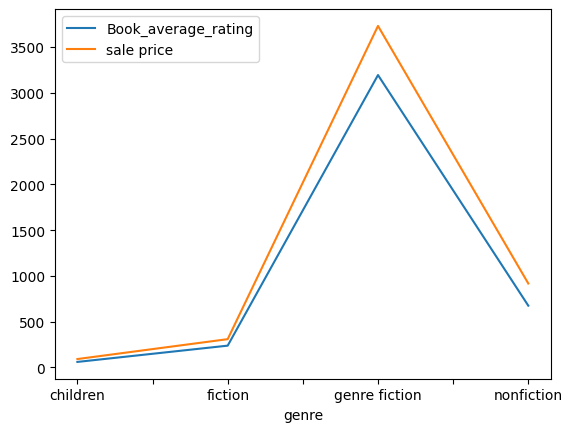

In [34]:
data = df[["genre", "Book_average_rating", "sale price"]].groupby("genre").sum()
data.plot()
data

According to the graph, as the rating goes up the sale price goes up. Also, here, the fictional books are most rated. It makes sense as the sales of fictional books is more higher in the company. Therefore the price increases respectively as the books popularity increases which brings good revenue generation for the company.

3) Compare the book ratings of each publisher and which publisher has the highest rated books?

In [35]:
df["Publisher"].value_counts()

Publisher
Amazon Digital Services,  Inc.          587
Random House LLC                        119
Penguin Group (USA) LLC                 100
HarperCollins Publishers                 68
Hachette Book Group                      62
Simon and Schuster Digital Sales Inc     56
Macmillan                                41
HarperCollins Publishing                  4
HarperCollins Christian Publishing        4
Name: count, dtype: int64

In [36]:
df.groupby("Publisher")["Book_average_rating"].sum().sort_values(ascending=False)

Publisher
Amazon Digital Services,  Inc.          2348.38
Random House LLC                         474.30
Penguin Group (USA) LLC                  403.48
HarperCollins Publishers                 272.41
Hachette Book Group                      245.10
Simon and Schuster Digital Sales Inc     226.36
Macmillan                                164.10
HarperCollins Christian Publishing        16.68
HarperCollins Publishing                  16.52
Name: Book_average_rating, dtype: float64

Amazon Digital Services Inc. has the most highly rated books compared to other publishers. Customers will be more attracted to these books; therefore, by selling this publisher, the company will earn more revenue.

4) Which author's book can be good for sales based on gross sales and sale price?

In [37]:
# gross sales/sale price = units sold
df["sales"]=df["gross sales"]/df["sale price"]
df.groupby("Author")["sales"].sum().idxmax()

'Stephen King'

Based on gross sales and sales price Stephen king's books are higher and these books can be prioritized in selling as it can bring more sales for the company.

5) Analyse which books sells better- Latest books or Old classic books

Text(0.5, 1.0, 'Sales Performance')

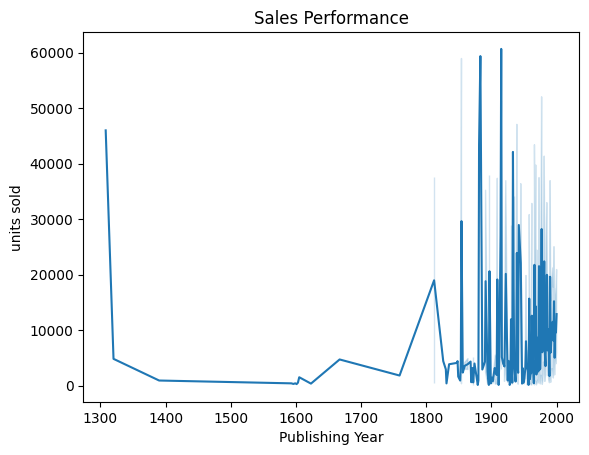

In [38]:
# First old books before 2000
new_year =  df[df["Publishing Year"] <= 2000]
sns.lineplot(x ="Publishing Year", y = "units sold", data = new_year)
plt.title("Sales Performance")

Text(0.5, 1.0, 'Sales Performance')

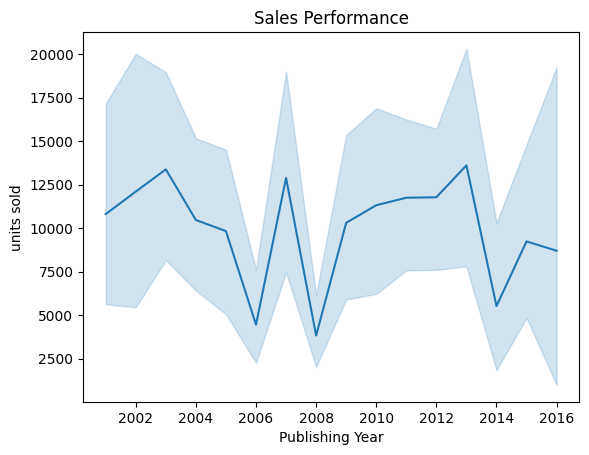

In [39]:
# Second new books after 2000
old_year = df[df["Publishing Year"] > 2000]
sns.lineplot(x ="Publishing Year", y = "units sold", data = old_year)
plt.title("Sales Performance")

As seen in the graphs, people prefer old classic books over the latest books from the 2000s. Units sold off the books of 2000s go below 15000, but old books before 2000s go till 60000 units.

Therefore prioritizing selling and promotion of this old books would be much more preferred by the customers as well as it will maximize revenue as well.

6) Evaluate the distribution of sales rank across different genres

<BarContainer object of 4 artists>

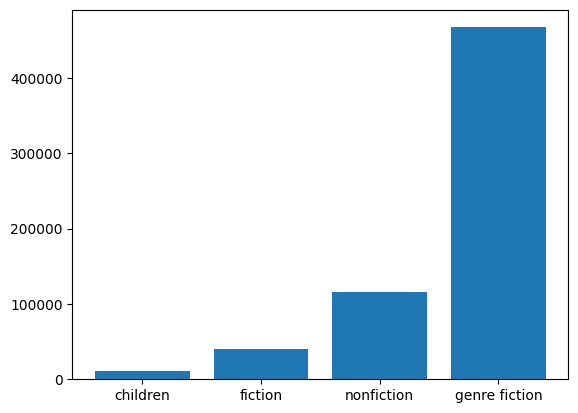

In [40]:
genre_units = df[["genre", "sales rank"]]
sold = genre_units.groupby("genre")["sales rank"].sum().reset_index()
sold = sold.sort_values(by ="sales rank")
plt.bar(x= sold["genre"], height = sold["sales rank"])

The most average ranked books are of the genre 'fiction' which goes above 700 and the lowest is 'genre fiction' which is under 600 according to the graph.


This suggest that there is strong demand for fictional books. The company can capitalize by increasing the sales of this genre to target audience.

7) Which books and authors can be discarded from the data based on gross sales and author rating respectively?

In [41]:
# based on gross sales
df.loc[df["gross sales"].idxmin()].to_frame().T

index Publishing Year  Book Name       Author Author_Rating  \
1047  1047          1987.0  Intensity  Dean Koontz     Excellent   

     Book_average_rating Book_ratings_count          genre gross sales  \
1047                4.04              58062  genre fiction      104.94   

     publisher revenue sale price sales rank                       Publisher  \
1047               0.0       0.99       1238  Amazon Digital Services,  Inc.   

     units sold  sales  
1047        106  106.0

Based on gross sales the book 'Intensity' has less gross sales that means less demand for this book therefore can be discarded from the sales or either can be sold for lesser price so that people buy it.

In [42]:
df["Author_Rating"].value_counts()

Author_Rating
Intermediate    614
Excellent       348
Famous           49
Novice           30
Name: count, dtype: int64

In [43]:
df[df["Author_Rating"] == "Novice"]

index  Publishing Year                                  Book Name  \
0         0           1975.0                                    Beowulf   
2         2           2015.0                          Go Set a Watchman   
53       53           2009.0                              The Magicians   
115     115           1390.0                       Tales of Caunterbury   
184     184           1949.0                        Death of a Salesman   
199     199           1947.0                     The Pearl of the World   
210     210           1998.0    The Girls' Guide to Hunting and Fishing   
276     276           2013.0                                 The Circle   
377     377           2006.0                           The Tenth Circle   
393     393           2011.0                          The Marriage Plot   
395     395           2015.0                        Luckiest Girl Alive   
400     400           2014.0                      Not that Kind of Girl   
470     470           2009.0                                  Het diner   
508     508           2009.0            Pride and Prejudice and Zombies   
545     545           2016.0                                   The Nest   
554     554           2004.0  Five Point Someone: What Not to Do at IIT   
580     580           1999.0                                   Mr Maybe   
643     643           2016.0                                  The Girls   
775     775           2013.0                            The Silent Wife   
803     803           2011.0                           The Tiger's Wife   
886     886           2008.0                      Chasing Harry Winston   
890     890           2005.0                            A Long Way Down   
899     899           2005.0                     Everyone Worth Knowing   
950     950           2009.0                       Her Fearful Symmetry   
995     995           1871.0                   The Red Badge of Courage   
1007   1007           2015.0                     A Spool of Blue Thread   
1016   1016           2004.0                          The Mermaid Chair   
1034   1034           2012.0                   Death Comes to Pemberley   
1035   1035           1911.0                                Ethan Frome   
1040   1040           1959.0                            The Naked Lunch   

                                                 Author Author_Rating  \
0                                Unknown, Seamus Heaney        Novice   
2                                            Harper Lee        Novice   
53                                         Lev Grossman        Novice   
115                    Geoffrey Chaucer, Nevill Coghill        Novice   
184                                       Arthur Miller        Novice   
199                                      John Steinbeck        Novice   
210                                        Melissa Bank        Novice   
276                                         Dave Eggers        Novice   
377                                        Jodi Picoult        Novice   
393                                   Jeffrey Eugenides        Novice   
395                                       Jessica Knoll        Novice   
400                          Lena Dunham, Joana Avillez        Novice   
470                            Herman Koch, Sam Garrett        Novice   
508                     Seth Grahame-Smith, Jane Austen        Novice   
545                             Cynthia D'Aprix Sweeney        Novice   
554                                       Chetan Bhagat        Novice   
580                                          Jane Green        Novice   
643                                          Emma Cline        Novice   
775                                     A.S.A. Harrison        Novice   
803                                         TÃ©a Obreht        Novice   
886                                   Lauren Weisberger        Novice   
890                                         Nick Hornby        Novice   
8

Based on the authors rating. the above authors are considered as 'novice' which is considered to be rated as beginners. These rated author's books can be set aside for sometime until they are rated above novice or else can be sold in less price.


8) Is there a correlation between gross sales, sale price, sales rank and units sold?

In [44]:
df[["gross sales", "sale price", "sales rank", "units sold"]].corr()

gross sales  sale price  sales rank  units sold
gross sales     1.000000    0.270313   -0.439743   -0.150050
sale price      0.270313    1.000000    0.072208    0.009742
sales rank     -0.439743    0.072208    1.000000    0.214753
units sold     -0.150050    0.009742    0.214753    1.000000

<Axes: >

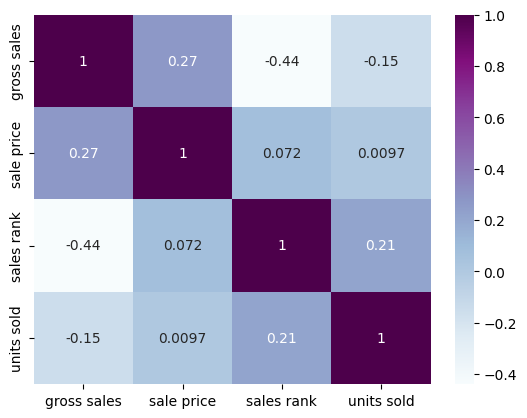

In [45]:
relation = df[["gross sales", "sale price", "sales rank", "units sold"]].corr()
sns.heatmap(relation, cmap = "BuPu", annot=True)

According to the correlation heatmap, sale price and gross sales are highly correlated with each other which means that when price of the book increases the gross sales which can increase the inflow to the company.

And the second most correlation we can see between sales rank and units sold. The sales of one particular book is ranked based on the units sold.


The least correlation we can see is between sales rank and gross sales.

In [46]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'Author_Rating',
       'Book_average_rating', 'Book_ratings_count', 'genre', 'gross sales',
       'publisher revenue', 'sale price', 'sales rank', 'Publisher',
       'units sold', 'sales'],
      dtype='object')

9) Analyse the ratio of each publisher's revenue.

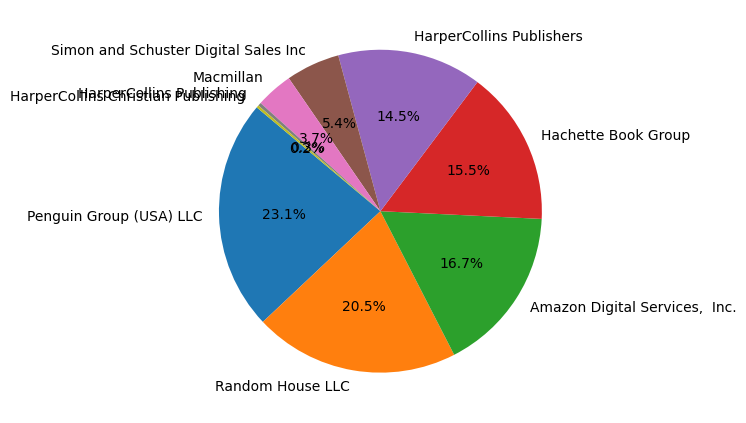

In [47]:
revenue = df.groupby("Publisher")["publisher revenue"].sum()
sorting = revenue.sort_values(ascending = False)
plt.pie(sorting, labels=sorting.index, autopct='%1.1f%%', startangle=140)
plt.tight_layout()

According to the above pie chart, the publisher that earns the most revenue is Penguin Group LLC. This means that they are the best in publishing and majority of authors rely on these publishers therefore they recieve high revenue than other publishers

10) How does sales performance of each book genre of the company vary based on different years?

<Figure size 1200x600 with 0 Axes>

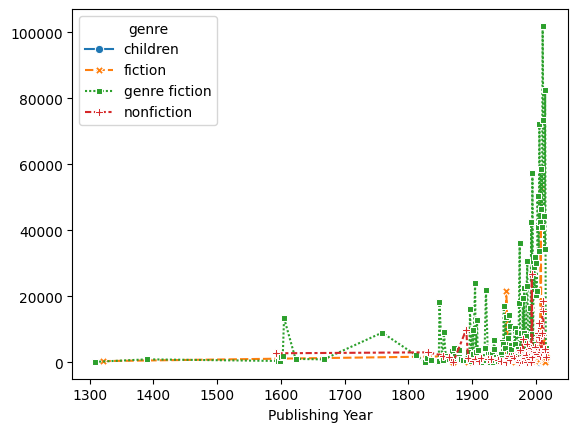

<Figure size 1200x600 with 0 Axes>

In [48]:
sales = df.groupby(["Publishing Year", "genre"])["gross sales"].sum().reset_index()
data = sales.pivot(index ="Publishing Year", columns = "genre", values = "gross sales")
sns.lineplot(data = data, markers = True)
plt.figure(figsize = (12,6))

<Figure size 1200x600 with 0 Axes>

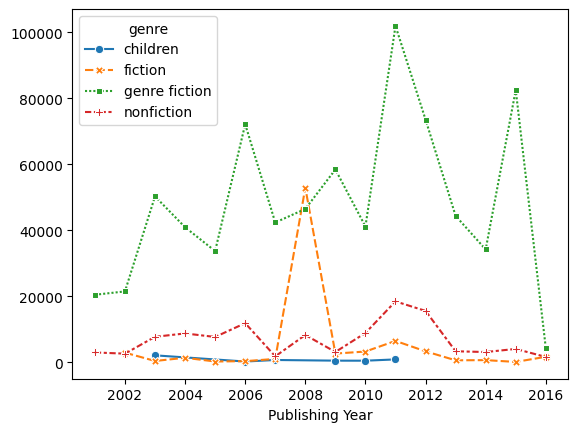

<Figure size 1200x600 with 0 Axes>

In [49]:
sales = df.groupby(["Publishing Year", "genre"])["gross sales"].sum().reset_index()
data = sales.pivot(index ="Publishing Year", columns = "genre", values = "gross sales")
data = data[data.index > 2000]
sns.lineplot(data = data, markers = True)
plt.figure(figsize = (12,6))

The sales performance is measured using gross sales. We can see that fiction genre brings more sales throughout the year and increasing every year. This means that sale price of the fiction are higher according to the above analysis and explorations which increases the gross sales.

The books for children are the lowest moving books with less years of sales.

This summarizes that people are more attracted to the fictional books as the year passes therefore it is profitable to increase the production of these books along with other books.